### Calculate SNR (dB) for reconstructed adversarial samples originating from uncompressed input

For this, I need the reconstructed files from 

downloads/en_raw_reconstructed

and the adversarial files from 

asr1/exp/tr_en_raw_ONLY_fbanks-Librosa_NO-cmvn_22.02.2020_pytorch_e4_12211_u320_proj320_d1_300_mtlalpha0.3_epo20_ss0.5_23.02.2020/ advEx_audio_from_csv_orig_espnet_method_noNorm

In [1]:
import glob, os
import csv
import numpy as np
import sys
import json
from os import listdir, getcwd, chdir

from pathlib import Path

In [ ]:
sys.path.insert(0, '/home/iustina/espnet/utils/')
sys.path.insert(0, '/home/iustina/espnet/')

In [2]:
en_raw_reconstr_path="./downloads/en_raw_reconstructed/extracted/"
en_raw_orig_path="./downloads/en/extracted/"
advEx_path="exp/tr_en_raw_ONLY_fbanks-Librosa_NO-cmvn_22.02.2020_pytorch_e4_12211_u320_proj320_d1_300_mtlalpha0.3_epo20_ss0.5_23.02.2020/advEx_audio_from_csv_orig_espnet_method_noNorm/"
advEx_path_compr="exp/tr_en_raw_ONLY_fbanks-Librosa_NO-cmvn_22.02.2020_pytorch_e4_12211_u320_proj320_d1_300_mtlalpha0.3_epo20_ss0.5_23.02.2020/advEx_compr_24kbps_FULLscale_espnet_noNorm/"

In [6]:


# def list_of_wav_files(dir_name,"txt"):
#     return (f for f in listdir(dir_name) if file.endswith('.' + "txt"))
#     enumerate(os.listdir(csv_folder_path))

# def list_of_wav_files(dir_name,"wav"):
#     return f for f in glob.glob("*.wav")
 
def list_files3(directory, extension):
    saved = getcwd()
    print(saved)
    chdir(directory)
    print('current directory before file search:'+ getcwd())
    it = glob.glob('**/*.' + extension, recursive = True)
    chdir(saved)
    print('current directory after file search:'+ getcwd())
    return it


In [7]:
#print(getcwd())
list_raw_reconstr_wavs=list_files3(en_raw_reconstr_path,'wav')
#print(en_raw_reconstr_wavs[0])

/home/iustina/espnet/egs/voxforge/asr1
current directory before file search:/home/iustina/espnet/egs/voxforge/asr1/downloads/en_raw_reconstructed/extracted
current directory after file search:/home/iustina/espnet/egs/voxforge/asr1


In [8]:
list_advEx_wavs = list_files3(advEx_path,'wav')

/home/iustina/espnet/egs/voxforge/asr1
current directory before file search:/home/iustina/espnet/egs/voxforge/asr1/exp/tr_en_raw_ONLY_fbanks-Librosa_NO-cmvn_22.02.2020_pytorch_e4_12211_u320_proj320_d1_300_mtlalpha0.3_epo20_ss0.5_23.02.2020/advEx_audio_from_csv_orig_espnet_method_noNorm
current directory after file search:/home/iustina/espnet/egs/voxforge/asr1


In [62]:
test = list_advEx_wavs[30]
utt_fullname = test.rsplit('_',1)[0]
print(utt_fullname)

wav_name = utt_fullname.rsplit('-',1)[1]
print(wav_name)
root_name = utt_fullname.rsplit('-',1)[0]
print(root_name)
full_path_orig_reconstr = en_raw_reconstr_path + root_name + '/wav/' + wav_name + '.wav'
full_path_orig = en_raw_orig_path + root_name + '/wav/' + wav_name + '.wav'
print(full_path_orig_reconstr) 
print(full_path_orig)

advEx_wav_path = advEx_path + test
print(advEx_wav_path)
advEx_wav_compr_path = advEx_path_compr + utt_fullname + '_advEx_24kbps.wav'
print(advEx_wav_compr_path)


kayray-20070608-rhi-rhi0025
rhi0025
kayray-20070608-rhi
./downloads/en_raw_reconstructed/extracted/kayray-20070608-rhi/wav/rhi0025.wav
./downloads/en/extracted/kayray-20070608-rhi/wav/rhi0025.wav
exp/tr_en_raw_ONLY_fbanks-Librosa_NO-cmvn_22.02.2020_pytorch_e4_12211_u320_proj320_d1_300_mtlalpha0.3_epo20_ss0.5_23.02.2020/advEx_audio_from_csv_orig_espnet_method_noNorm/kayray-20070608-rhi-rhi0025_advEx.wav
exp/tr_en_raw_ONLY_fbanks-Librosa_NO-cmvn_22.02.2020_pytorch_e4_12211_u320_proj320_d1_300_mtlalpha0.3_epo20_ss0.5_23.02.2020/advEx_compr_24kbps_FULLscale_espnet_noNorm/kayray-20070608-rhi-rhi0025_advEx_24kbps.wav


In [3]:
import numpy as np
from scipy.io.wavfile import read
import librosa
import sys
import matplotlib.pyplot as plt
%matplotlib inline 

In [63]:
# Reading the wav files (original, reconstructed and AdvEx)

orig_raw_wav, fs = librosa.load(full_path_orig,sr=16000)
print("The fs, shape, max and min value of original raw wav utt " + utt_fullname + " read with librosa are: ", fs, orig_raw_wav.shape, orig_raw_wav.max(), orig_raw_wav.min()) 
orig_raw_wav_reconstr, fs = librosa.load(full_path_orig_reconstr,sr=16000)
print("The fs, shape, max and min value of original raw wav RECONSTR utt " + utt_fullname + " read with librosa are: ", fs, orig_raw_wav_reconstr.shape, orig_raw_wav_reconstr.max(), orig_raw_wav_reconstr.min()) 

advEx_wav, fs = librosa.load(advEx_wav_path,sr=16000)
print("The fs, shape, max and min value of advEx wav utt " + utt_fullname + " read with librosa are: ", fs, advEx_wav.shape, advEx_wav.max(), advEx_wav.min()) 

advEx_wav_compr, fs = librosa.load(advEx_wav_compr_path,sr=16000)
print("The fs, shape, max and min value of COMPR advEx wav utt " + utt_fullname + " read with librosa are: ", fs, advEx_wav_compr.shape, advEx_wav_compr.max(), advEx_wav_compr.min()) 


The fs, shape, max and min value of original raw wav utt kayray-20070608-rhi-rhi0025 read with librosa are:  16000 (52481,) 0.52352905 -0.33544922
The fs, shape, max and min value of original raw wav RECONSTR utt kayray-20070608-rhi-rhi0025 read with librosa are:  16000 (52480,) 0.3774414 -0.37921143
The fs, shape, max and min value of advEx wav utt kayray-20070608-rhi-rhi0025 read with librosa are:  16000 (52480,) 0.63256836 -0.69903564
The fs, shape, max and min value of COMPR advEx wav utt kayray-20070608-rhi-rhi0025 read with librosa are:  16000 (53615,) 0.6329651 -0.69091797


Text(0.5,1,'AdvEx compr')

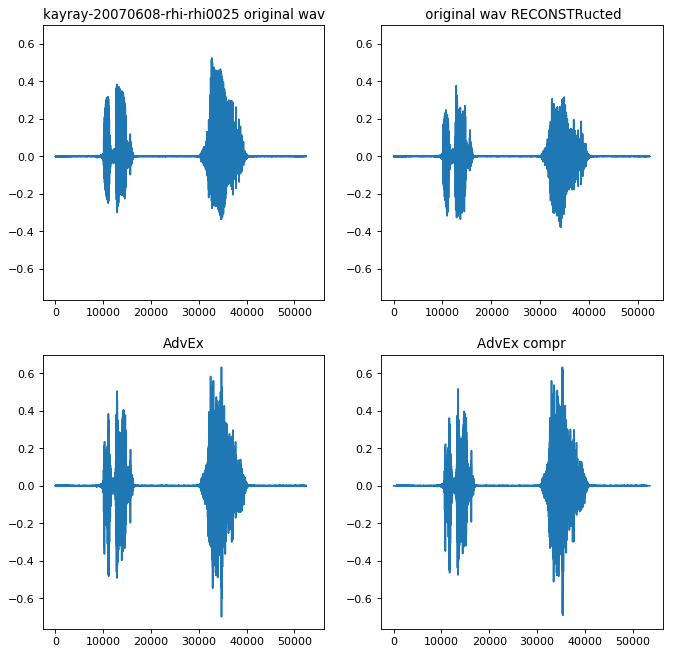

In [64]:
fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
#fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222, sharey=ax1)
ax3 = fig.add_subplot(223, sharex=ax1, sharey=ax1)
ax4 = fig.add_subplot(224, sharex=ax3, sharey=ax3)

ax1.plot(orig_raw_wav)
ax1.set_title(utt_fullname + " original wav")
ax2.plot(orig_raw_wav_reconstr)
ax2.set_title(" original wav RECONSTRucted")
#plt.title("Direct reconstructed audio from the features - after 16 bit conversion, before being written to .wav")
ax3.plot(advEx_wav)
ax3.set_title("AdvEx")
ax4.plot(advEx_wav_compr)
ax4.set_title("AdvEx compr")

# plt.subplot(121)
# plt.plot(orig_raw_wav)
# plt.title(utt_fullname + " original wav ")
# plt.subplot(122)
# plt.plot(orig_raw_wav_reconstr)
# plt.title(utt_fullname + " original wav RECONSTRucted")

### Power & SNR computation

In [65]:
pow_orig = np.sum(orig_raw_wav**2)
pow_orig_reconstr = np.sum(orig_raw_wav_reconstr**2)
pow_advEx = np.sum(advEx_wav**2)
pow_advEx_compr = np.sum(advEx_wav_compr**2)

pow_advEx_NOISE = pow_advEx - pow_orig_reconstr # the reference is the orig RECONSTR. audio!!
snr_advEx = 10*np.log10(pow_orig_reconstr/pow_advEx_NOISE)
print('Estimated SNR of AdvEx is ' + str(snr_advEx) + ' dB')

pow_advEx_NOISE_compr = pow_advEx_compr - pow_orig_reconstr
snr_advEx_compr = 10*np.log10(pow_orig_reconstr/pow_advEx_NOISE_compr)
print('Estimated SNR is AdvEx compr is ' + str(snr_advEx_compr) + ' dB')


Estimated SNR of AdvEx is -0.2080247737467289 dB
Estimated SNR is AdvEx compr is 0.3546066954731941 dB


### Do the same power and SNR computation, but in a LOOP !!

In [140]:
snrs_advEx=[] #np.empty
snrs_advEx_compr= [] #np.empty

#dict_SNRs = {}
#log_file=open("log_SNR_measurment_AdvEx_from_uncompressed_test_data_11.04.2020.txt", "a")

for idx, advEx in enumerate(list_advEx_wavs):
    if idx % 500 == 0:
        log_file.write("Computing SNR for advEx " + advEx + " in iteration " + str(idx)+"\n")
        print("Computing SNR for advEx " + advEx + " in iteration " + str(idx))
    
    #       Get file names and paths:
    
    utt_fullname = advEx.rsplit('_',1)[0]
    #print(utt_fullname)
    wav_name = utt_fullname.rsplit('-',1)[1]
    #print(wav_name)
    root_name = utt_fullname.rsplit('-',1)[0]
    #print(root_name)
    full_path_orig_reconstr = en_raw_reconstr_path + root_name + '/wav/' + wav_name + '.wav'
    full_path_orig = en_raw_orig_path + root_name + '/wav/' + wav_name + '.wav'
    #print(full_path_orig_reconstr) 
    #print(full_path_orig)
    advEx_wav_path = advEx_path + advEx
    #print(advEx_wav_path)
    advEx_wav_compr_path = advEx_path_compr + utt_fullname + '_advEx_24kbps.wav'
    #print(advEx_wav_compr_path)
    

    if os.path.isfile(full_path_orig):
        # #           Read the corresponding files
        orig_raw_wav, fs = librosa.load(full_path_orig,sr=16000)
        orig_raw_wav_reconstr, fs = librosa.load(full_path_orig_reconstr,sr=16000)
        advEx_wav, fs = librosa.load(advEx_wav_path,sr=16000)
        advEx_wav_compr, fs = librosa.load(advEx_wav_compr_path,sr=16000)

        #               Compute power & SNR
        pow_orig = np.sum(orig_raw_wav**2)
        pow_orig_reconstr = np.sum(orig_raw_wav_reconstr**2)
        pow_advEx = np.sum(advEx_wav**2)
        pow_advEx_compr = np.sum(advEx_wav_compr**2)
        pow_advEx_NOISE = pow_advEx - pow_orig_reconstr # the reference is the orig RECONSTR. audio!!
        snrs_advEx.append(10*np.log10(pow_orig_reconstr/pow_advEx_NOISE))
        #print('Estimated SNR of AdvEx is ' + str(snr_advEx) + ' dB')
        pow_advEx_NOISE_compr = pow_advEx_compr - pow_orig_reconstr
        snrs_advEx_compr.append(10*np.log10(pow_orig_reconstr/pow_advEx_NOISE_compr))
        #print('Estimated SNR is AdvEx compr is ' + str(snr_advEx_compr) + ' dB')

# dict_SNRs[utt_fullname] = 40
        #dict_SNRs[utt_fullname] = []
        #dict_SNRs[utt_fullname].append({'Power orig': float(pow_orig), 'Power orig. reconstr.' : float(pow_orig_reconstr), 'Power AdvEx' : float(pow_advEx), 'Power AdvEx compr' : float(pow_advEx_compr), 'SNR AdvEx' : float(snr_advEx), 'SNR AdvEx compr' : float(snr_advEx_compr)})


#log_file.close()

# dict = {}
# dict["data"] = []
# dict["data"].append({'type': 'poi', 'lat': 123})
# dict["data"].append({'type': 'locale', 'lat': 321})
# dict

Computing SNR for advEx anonymous-20121102-lnf-a0020_advEx.wav in iteration 0
Computing SNR for advEx anonymous-20100820-bzn-a0255_advEx.wav in iteration 500
Computing SNR for advEx vschum-20090719-dob-a0049_advEx.wav in iteration 1000
Computing SNR for advEx knotyouraveragejo-20070620-sci-sci0230_advEx.wav in iteration 1500
Computing SNR for advEx bjb-20120304-vf8-33_advEx.wav in iteration 2000
Computing SNR for advEx pcsnpny-20150317-htb-rb-30_advEx.wav in iteration 2500
Computing SNR for advEx pcsnpny-20150303-ukl-a0028_advEx.wav in iteration 3000
Computing SNR for advEx tomhannen-20080409-cc-11_advEx.wav in iteration 3500
Computing SNR for advEx anonymous-20080608-ria-a0438_advEx.wav in iteration 4000
Computing SNR for advEx bugsysservant-20091105-mnz-b0441_advEx.wav in iteration 4500
Computing SNR for advEx anonymous-20100922-aov-a0138_advEx.wav in iteration 5000
Computing SNR for advEx doublesfrogs-20150224-htc-a0020_advEx.wav in iteration 5500
Computing SNR for advEx EricHedekar

In [98]:
import json
  # Save the SNR dictionary in a json file
# with open('SNR_dB_for_AdvEx_from_uncompressed_test_data.json', 'w') as f:
#         #f.write(json.dumps(dict_SNRs, indent=4, ensure_ascii=False, sort_keys=True).encode('utf_8'))
#         json.dumps(dict_SNRs, f)

f = open("dict.json","w")
f.write(json.dumps(dict_SNRs))
f.close()
### I keep getting some damn errors!!!

### Plot histograms

Text(0.5,1,'Histogram of SNRs for all reconstructed adversarial utterances')

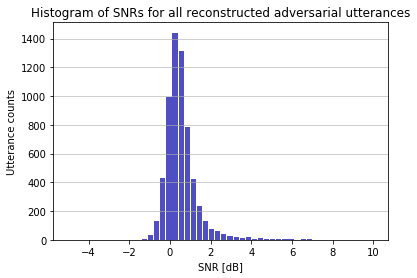

In [141]:
# Some trial first !

snrs_advEx=np.asarray(snrs_advEx)
snrs_advEx_compr=np.asarray(snrs_advEx_compr)
snrs_advEx_compr2 = snrs_advEx_compr[~np.isnan(snrs_advEx_compr)] #remove NaN values

#n, bins, patches = plt.hist(x=snrs_advEx_compr, bins=300, range=(snrs_advEx_compr.min(), snrs_advEx_compr.max()), color='#0504aa', alpha=0.7, rwidth=0.85)
n, bins, patches = plt.hist(x=snrs_advEx_compr, bins=50, range=(-5, 10), color='#0504aa', alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('SNR [dB]')
plt.ylabel('Utterance counts')
plt.title('Histogram of SNRs for all reconstructed adversarial utterances')
# Set a clean upper y-axis limit.
#plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

# plt.hist(x, density=True, bins=30)  # `density=False` would make counts
# plt.ylabel('Probability')
# plt.xlabel('Data');

#print('Histogram counts for each bin: ' + str(n))

### Actual histogram plots

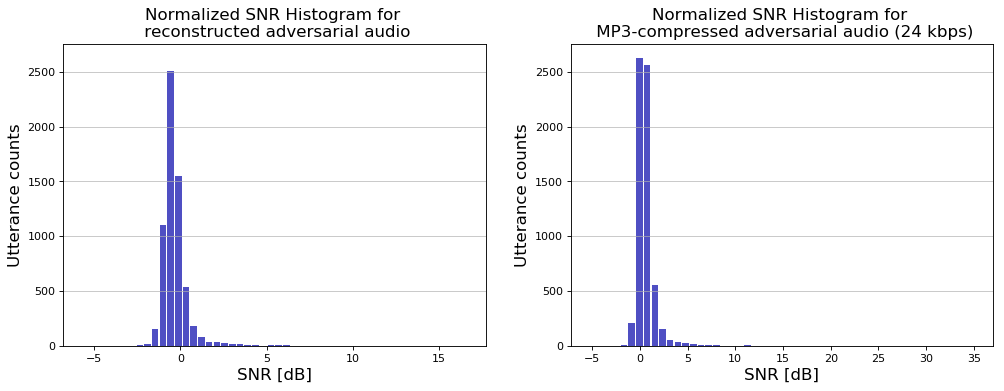

In [148]:
snrs_advEx_compr = snrs_advEx_compr[~np.isnan(snrs_advEx_compr)] #remove NaN values

fig2 = plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
#fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

ax1 = fig2.add_subplot(121)
ax2 = fig2.add_subplot(122, sharey=ax1)
#ax3 = fig.add_subplot(223, sharex=ax1, sharey=ax1)
#ax4 = fig.add_subplot(224, sharex=ax3, sharey=ax3)
n_bins=50
min_range=-5
max_range=10
ax1.hist(snrs_advEx, bins=n_bins, color='#0504aa', alpha=0.7, rwidth=0.85) # density = True means we transform the hist in a prob distrib (only then I can write NOrmalized Histogram in the title!!!)
ax1.set_title('Normalized SNR Histogram for \n reconstructed adversarial audio', fontsize=15)
ax1.set_xlabel('SNR [dB]', fontsize=15) #AttributeError: 'AxesSubplot' object has no attribute 'xlabel'
ax1.set_ylabel('Utterance counts', fontsize=15)
ax1.grid(axis='y', alpha=0.75)
ax2.hist(snrs_advEx_compr2, bins=n_bins, color='#0504aa', alpha=0.7, rwidth=0.85)
ax2.set_title("Normalized SNR Histogram for \n MP3-compressed adversarial audio (24 kbps)", fontsize=15)
ax2.set_xlabel('SNR [dB]', fontsize=15)
ax2.set_ylabel('Utterance counts', fontsize=15)
ax2.grid(axis='y', alpha=0.75)

#fig2.savefig('SNR_Histograms_of_AdvEx_from_uncompressed_data_nbins=' + str(n_bins) + '_range_' + str(min_range) + '_' + str(max_range) + 'dB_NORM.jpg')

# fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
# # # We can set the number of bins with the `bins` kwarg
# axs[0].hist(snrs_advEx, bins=50)
# axs[1].hist(snrs_advEx_compr, bins=50)

# plt.hist(x, density=True, bins=30)  # `density=False` would make counts
# plt.ylabel('Probability')
# plt.xlabel('Data')



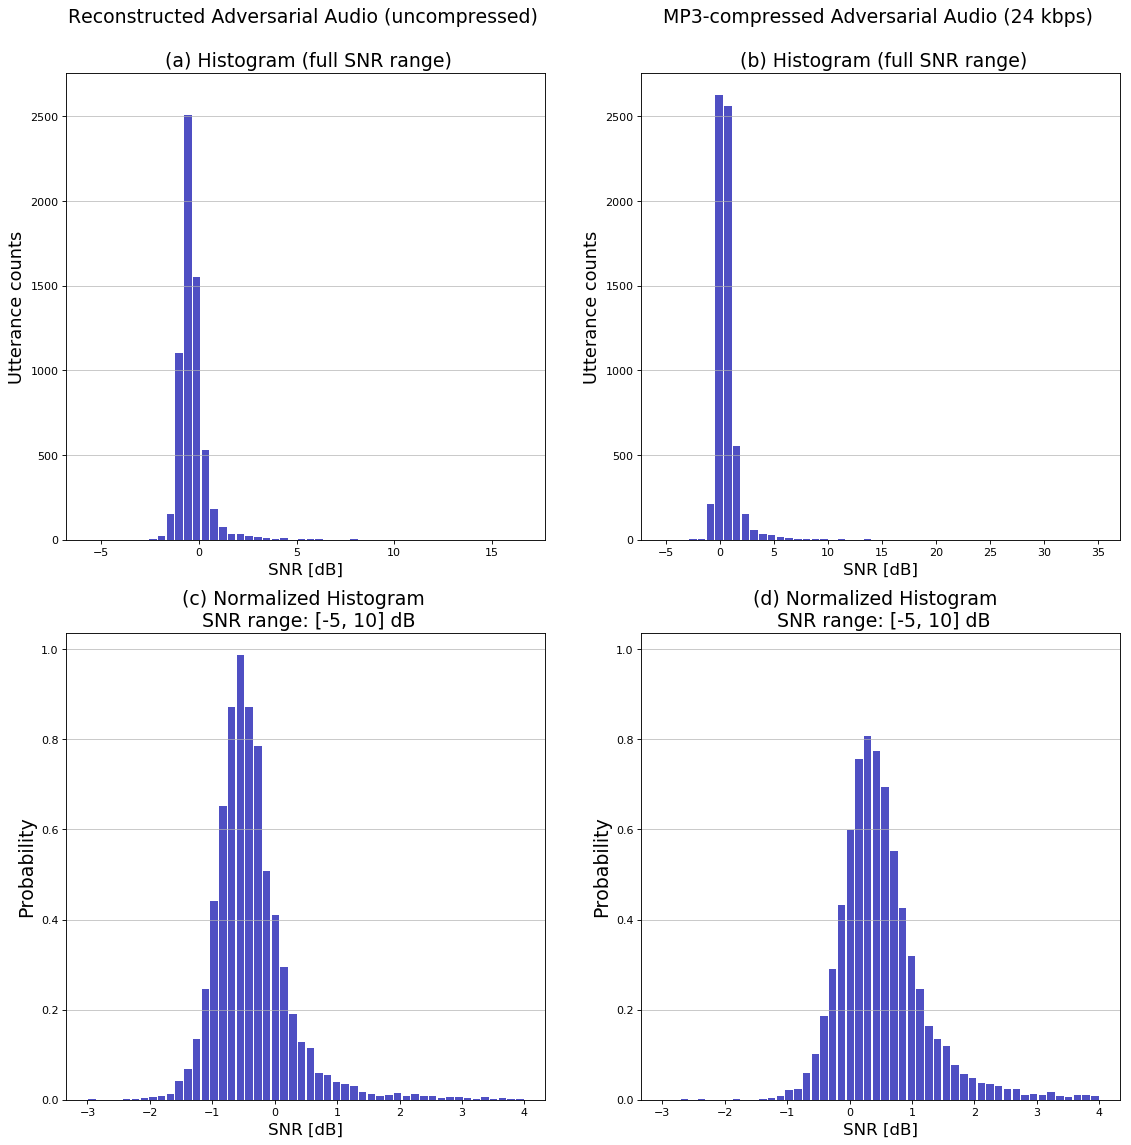

In [155]:
### Make the full range histogram and a close-up !!
histo = plt.figure(figsize=(17, 17), dpi= 80, facecolor='w', edgecolor='k')

ax1 = histo.add_subplot(221)
ax2 = histo.add_subplot(222, sharey=ax1)
ax3 = histo.add_subplot(223)#, sharex=ax1, sharey=ax1)
ax4 = histo.add_subplot(224, sharex=ax3, sharey=ax3)
n_bins=50
min_range=-3
max_range=4
ax1.hist(snrs_advEx, bins=n_bins, color='#0504aa', alpha=0.7, rwidth=0.85) # density = True means we transform the hist in a prob distrib
ax1.set_title('Reconstructed Adversarial Audio (uncompressed) \n \n (a) Histogram (full SNR range)', fontsize=17)
ax1.set_xlabel('SNR [dB]', fontsize=15) #AttributeError: 'AxesSubplot' object has no attribute 'xlabel'
ax1.set_ylabel('Utterance counts', fontsize=16)
ax1.grid(axis='y', alpha=0.75)
ax2.hist(snrs_advEx_compr2, bins=n_bins, color='#0504aa', alpha=0.7, rwidth=0.85)
ax2.set_title("MP3-compressed Adversarial Audio (24 kbps) \n \n (b) Histogram (full SNR range)", fontsize=17)
ax2.set_xlabel('SNR [dB]', fontsize=15)
ax2.set_ylabel('Utterance counts', fontsize=16)
ax2.grid(axis='y', alpha=0.75)

ax3.hist(snrs_advEx, bins=n_bins, range=(min_range, max_range), density=True, stacked=True,color='#0504aa', alpha=0.7, rwidth=0.85) # density = True means we transform the hist in a prob distrib
ax3.set_title('(c) Normalized Histogram \n SNR range: [-5, 10] dB', fontsize=17)
ax3.set_xlabel('SNR [dB]', fontsize=15) #AttributeError: 'AxesSubplot' object has no attribute 'xlabel'
ax3.set_ylabel('Probability', fontsize=17)
ax3.grid(axis='y', alpha=0.75)
ax4.hist(snrs_advEx_compr2, bins=n_bins, range=(min_range, max_range), density=True, stacked=True, color='#0504aa', alpha=0.7, rwidth=0.85)
ax4.set_title("(d) Normalized Histogram  \n SNR range: [-5, 10] dB", fontsize=17)
ax4.set_xlabel('SNR [dB]', fontsize=15)
ax4.set_ylabel('Probability', fontsize=17)
ax4.grid(axis='y', alpha=0.75)
histo.savefig('20.04.2020_SNR_Histograms_4x_original+normalized_with_smaller_ranges_nbins=' + str(n_bins) + '.jpg')

In [155]:
print('Min and max of SNR values for RECONSTRucted adv. audios: ' + str(snrs_advEx.min()) + ' dB, ' + str(snrs_advEx.max()) + ' dB')

print('Min and max of SNR values for mp3-COMPRessed adv. audios: ' + str(snrs_advEx_compr.min()) + ' dB, ' + str(snrs_advEx_compr2.max()) + ' dB')

Min and max of SNR values for RECONSTRucted adv. audios: -5.714017152786255 dB, 16.665815114974976 dB
Min and max of SNR values for mp3-COMPRessed adv. audios: -5.296958684921265 dB, 35.08562088012695 dB


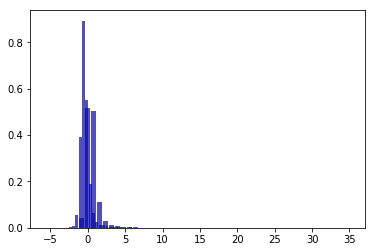

In [149]:
n_bins=50
n1, _,_ = plt.hist(snrs_advEx, bins=n_bins, color='#0504aa', density = True, alpha=0.7, rwidth=0.85) # range=(min_range, max_range), density = True means we transform the hist in a prob distrib
#n1_stacked, _,_ = plt.hist(snrs_advEx, bins=n_bins, range=(min_range, max_range), density = True,color='#0504aa', alpha=0.7, rwidth=0.85) # range=(min_range, max_range), density = True means we transform the hist in a prob distrib
n2, _,_ = plt.hist(snrs_advEx_compr2, bins=n_bins, density = True, color='#0504aa', alpha=0.7, rwidth=0.85) # cumulative = True +> for a cumulative prob distrib !!
#print('Histogram values for Reconstructed Adv. audio SNRs: ', n1)
#print('Histogram values for Reconstructed Adv. audio SNRs (Stakced version): ', n1_stacked)
# Obs: we see no diff in the values between stacked and no stacked
#print('Histogram values for MP3 Adv. audio SNRs: ', n2)

### Compute the Kolmogorov-Smirnov statistic on 2 samples (to check if our 2 histograms come from the same underlying distribution)

In [152]:
#from scipy import stats

stats.ks_2samp(n1,n2, alternative='less')
# first returned value by this function is ks_test_statistic, second returned value is p_value (if smaller than 0.05, we reject the null hyp => the 2 samples that we test come from different distributions)

Ks_2sampResult(statistic=0.28, pvalue=0.019597365770579005)

In [91]:
#       Try a 2-sample T test on 2 independent samples as well !

stats.ttest_ind(n1, n2, equal_var=True)

### OBS!!! Here I apply the T test on the histogram counts, but I should apply a PAIRED T-test to the original arrays of SNRs!!! (Before and after compression)
# Actually

Ttest_indResult(statistic=0.7543130570634748, pvalue=0.4524700059224823)

In [130]:
nan_idxs = np.argwhere(np.isnan(snrs_advEx_compr))
# Delete the elements at the NaN indexes from both SNR arrays
snrs_advEx_noNaNs = np.delete(snrs_advEx,nan_idxs)
snrs_advEx_compr_noNaNs = np.delete(snrs_advEx_compr,nan_idxs)

#_, paired_ttest_pval = stats.ttest_rel(snrs_advEx, snrs_advEx_compr, nan_policy='omit')
stats.ttest_rel(snrs_advEx_noNaNs, snrs_advEx_compr_noNaNs)
# I keep getting a p value of 0, even when I work with non NaNs arrays


Ttest_relResult(statistic=-121.76214929098668, pvalue=0.0)

Ks_2sampResult(statistic=0.348, pvalue=2.973978013566425e-27)

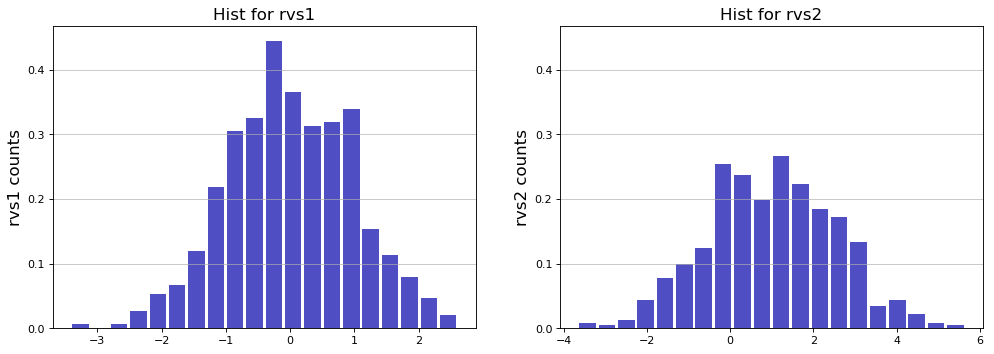

In [98]:
# Test the examples from scipy manual
np.random.seed(12345678)
rvs1 = stats.norm.rvs(size=500, loc=0., scale=1)
rvs2 = stats.norm.rvs(size=500, loc=1, scale=1.5)
fig3 = plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
#fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

ax1 = fig3.add_subplot(121)
ax2 = fig3.add_subplot(122, sharey=ax1)
#ax3 = fig.add_subplot(223, sharex=ax1, sharey=ax1)
#ax4 = fig.add_subplot(224, sharex=ax3, sharey=ax3)
n_bins=20
min_range=-5
max_range=10
ax1.hist(rvs1, bins=n_bins, density=True, stacked=True, color='#0504aa', alpha=0.7, rwidth=0.85) # density = True means we transform the hist in a prob distrib
ax1.set_title('Hist for rvs1', fontsize=15)
#ax1.set_xlabel('SNR [dB]', fontsize=15) #AttributeError: 'AxesSubplot' object has no attribute 'xlabel'
ax1.set_ylabel('rvs1 counts', fontsize=15)
ax1.grid(axis='y', alpha=0.75)
ax2.hist(rvs2, bins=n_bins, density=True, stacked=True, color='#0504aa', alpha=0.7, rwidth=0.85)
ax2.set_title("Hist for rvs2", fontsize=15)
#ax2.set_xlabel('SNR [dB]', fontsize=15)
ax2.set_ylabel('rvs2 counts', fontsize=15)
ax2.grid(axis='y', alpha=0.75)

stats.ks_2samp(rvs1, rvs2)
#stats.ttest_ind(rvs1,rvs2, equal_var=True)